<a href="https://colab.research.google.com/github/heysourin/End-to-end-ML-Project-Seoul-Bike-Demand-Prediction/blob/main/Soul_bike_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d saurabhshahane/seoul-bike-sharing-demand-prediction

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/126k [00:00<?, ?B/s]
100% 126k/126k [00:00<00:00, 13.9MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/seoul-bike-sharing-demand-prediction.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Data, extracted!")

Data, extracted!


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [5]:
df = pd.read_csv('/content/SeoulBikeData.csv', encoding="unicode_escape")

In [6]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [7]:
df.shape

(8760, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [10]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
# Feature engg: date time
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extracting day, month, and year into separate columns
df["weekday"] = df["Date"].dt.day_name()
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Deleting the main column
df.drop("Date", axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekday                    8760 non-null   objec

In [13]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day weekday  \
0           0.0            0.0  Winter  No Holiday             Yes  Friday   
1           0.0            0.0  Winter  No Holiday             Yes  Friday   
2           0.0            0.0  Winter  No Holiday             Yes  Friday   
3           0.0            0.0  Winter  No Holiday             Yes  Friday   
4           0.0            0.0  Winter  No Holiday             Yes  Friday   

   Day  Month  Year  
0    1     12  2017  
1    1     12  2017  
2    1     12  2017  
3    1     12  2017  
4    1     12  2017

---
## **EDA:**

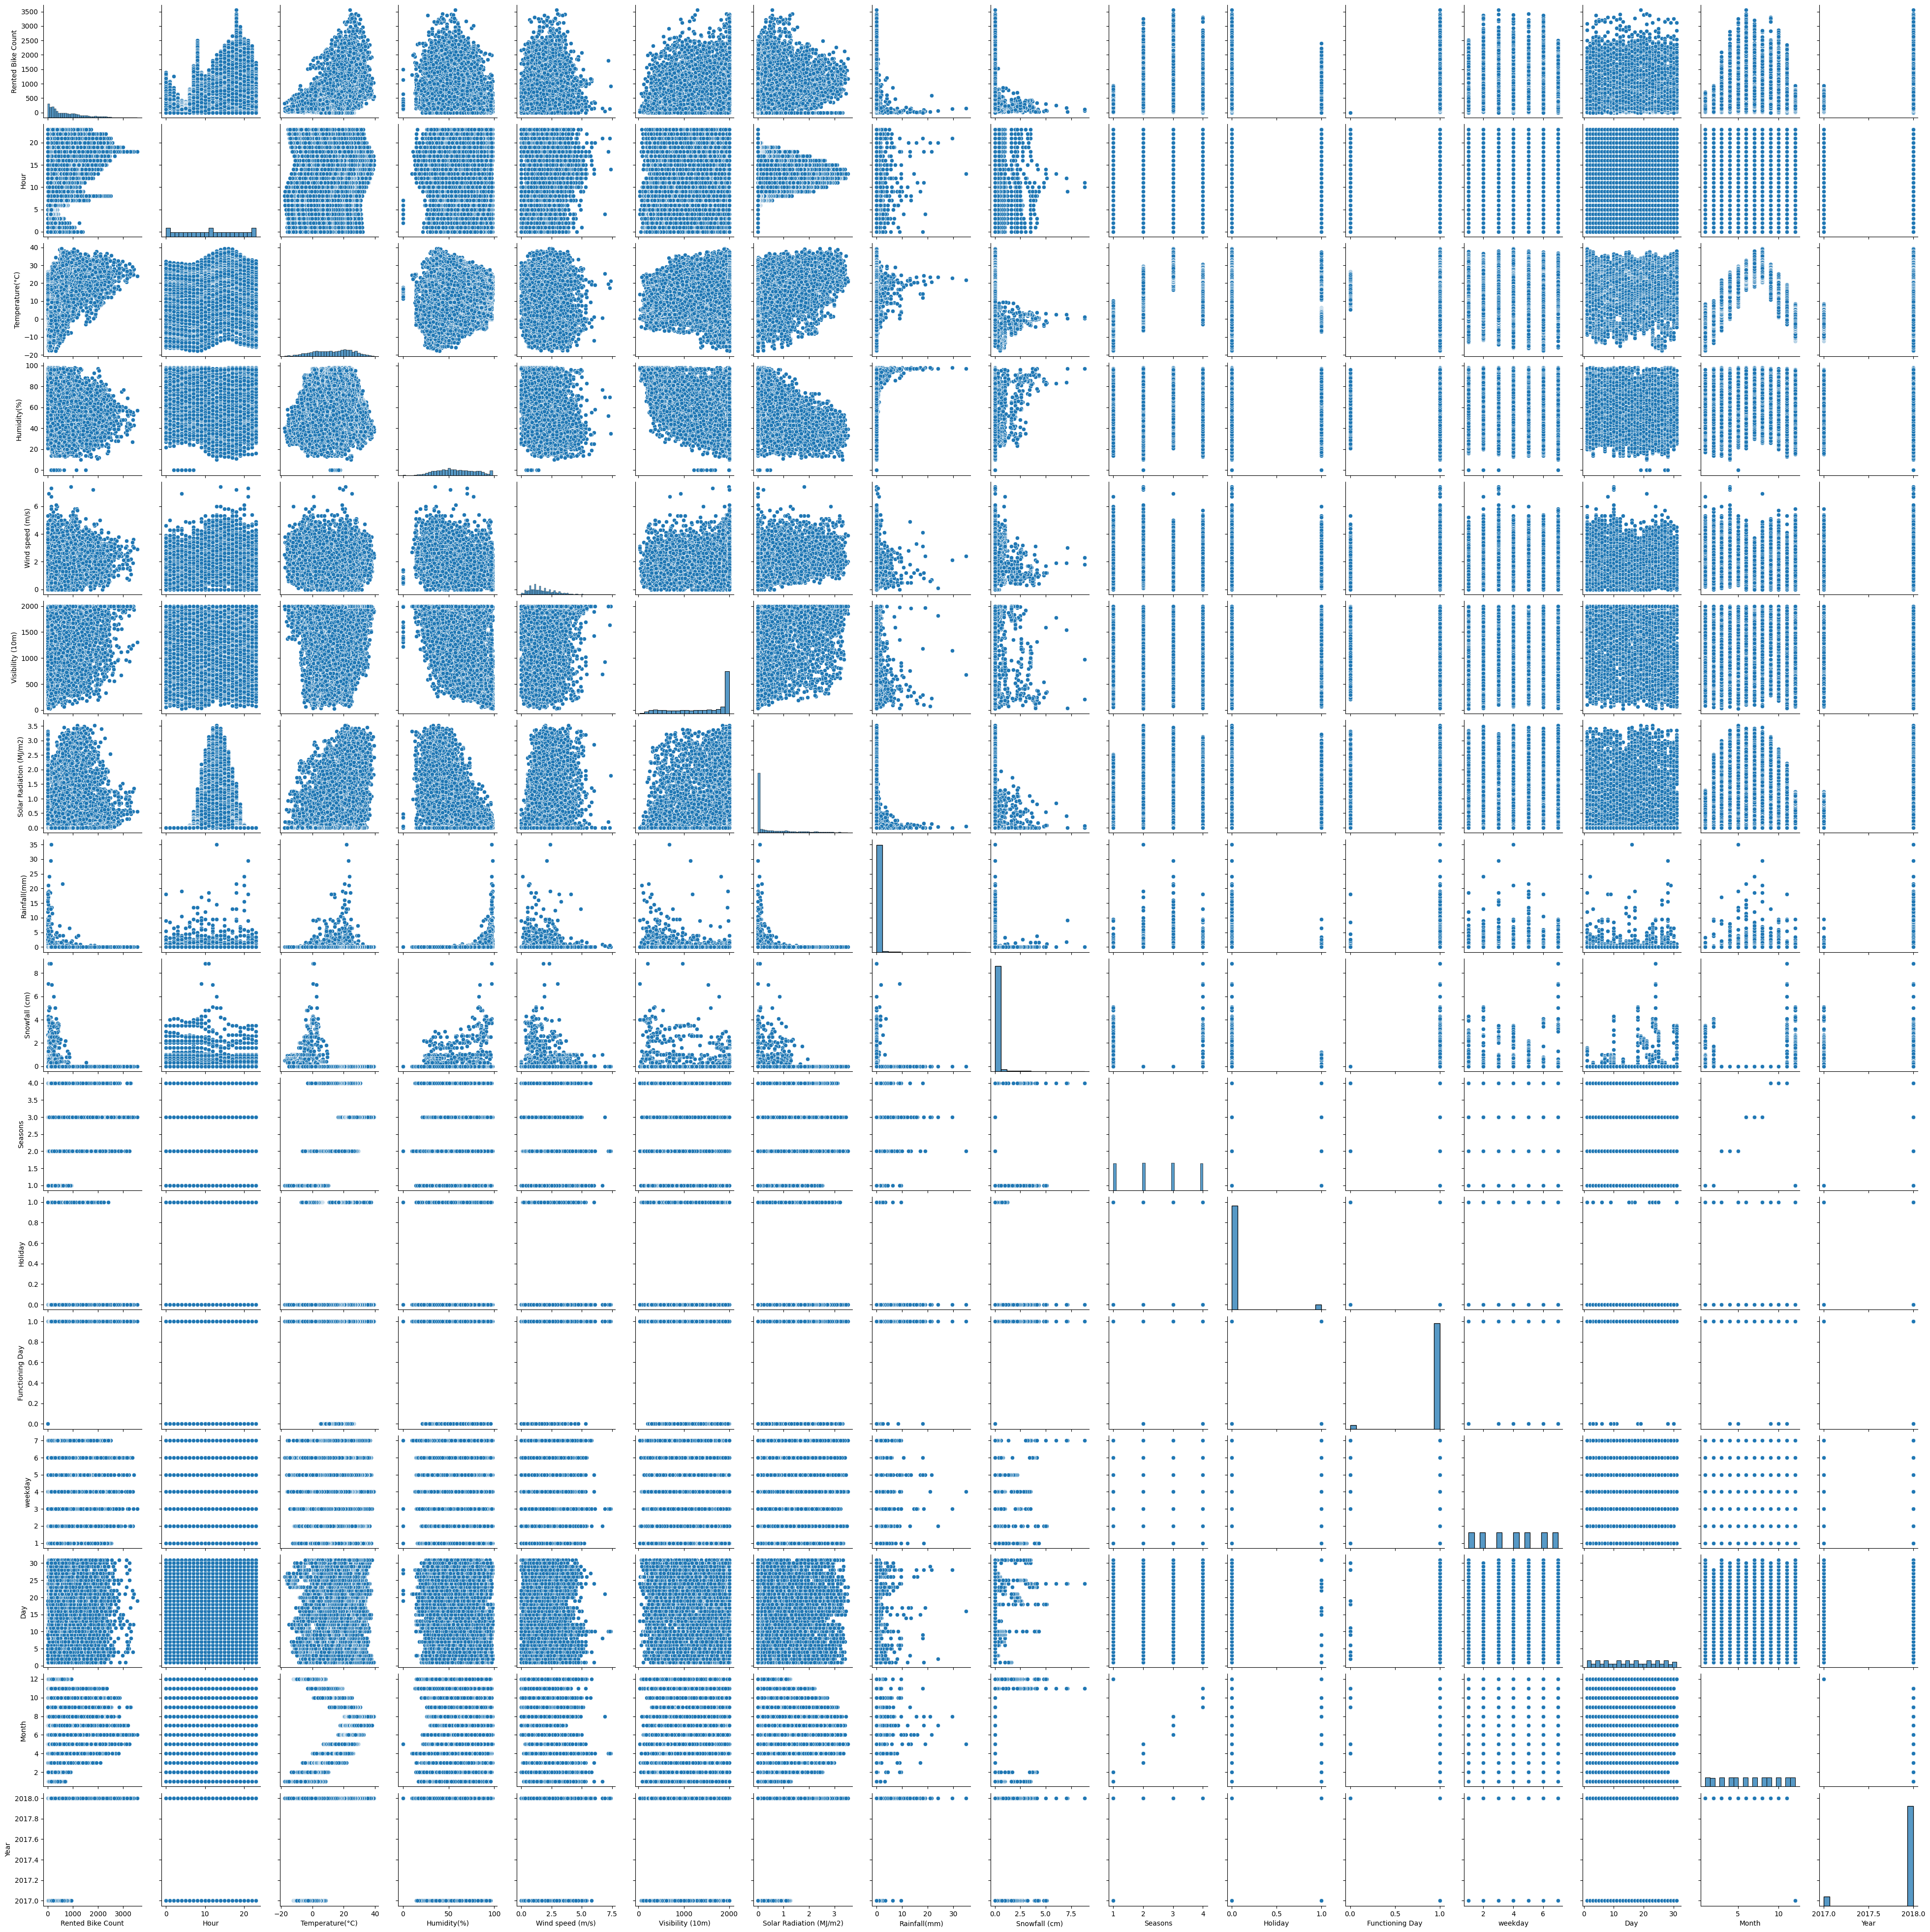

In [96]:
sns.pairplot(df)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

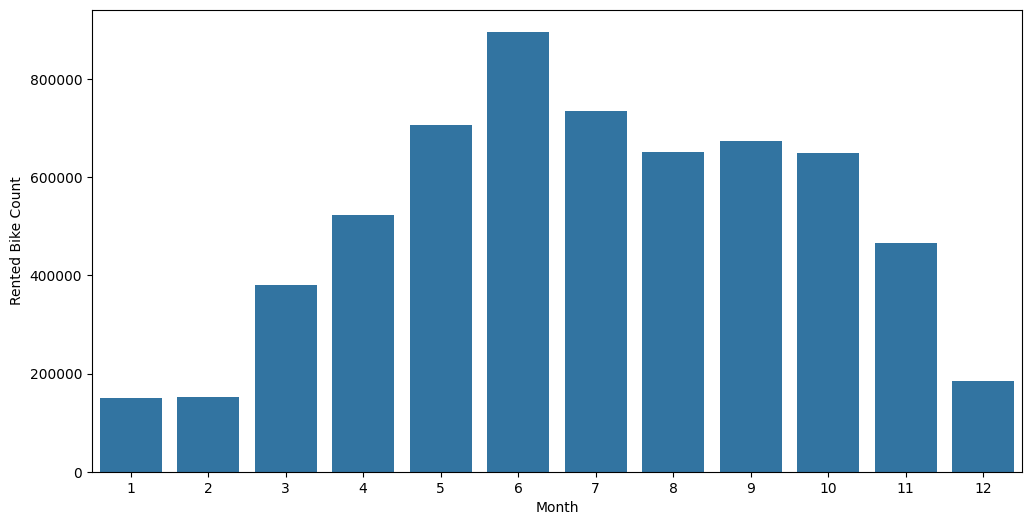

In [15]:
plt.figure(figsize=(12, 6))
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count", data=Month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

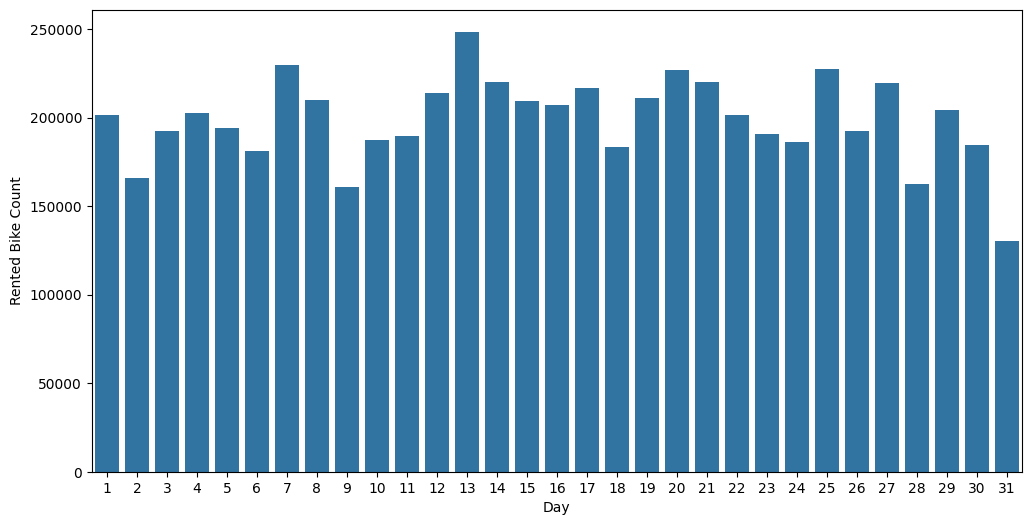

In [16]:
plt.figure(figsize=(12, 6))
Day = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="Rented Bike Count", data=Day)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

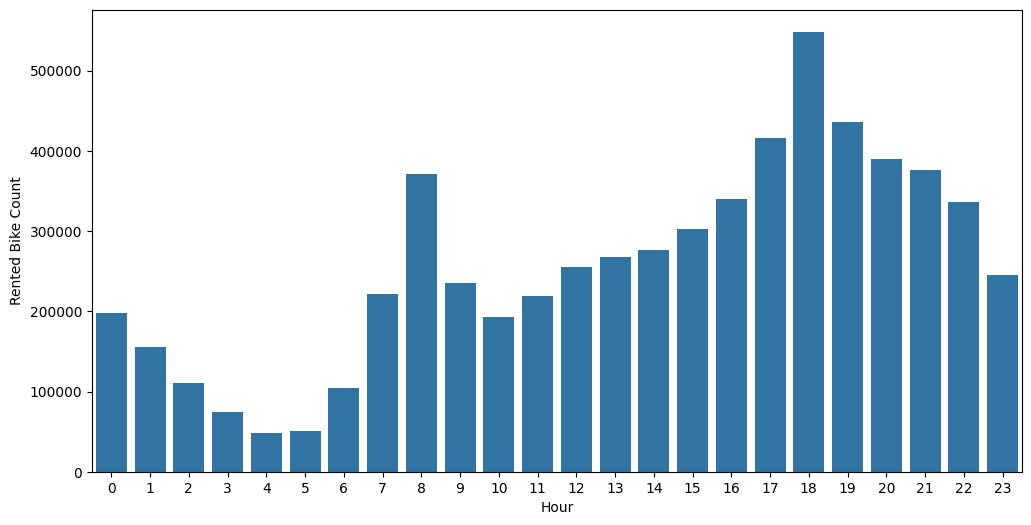

In [17]:
plt.figure(figsize=(12, 6))
Hour = df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour", y="Rented Bike Count", data=Hour)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

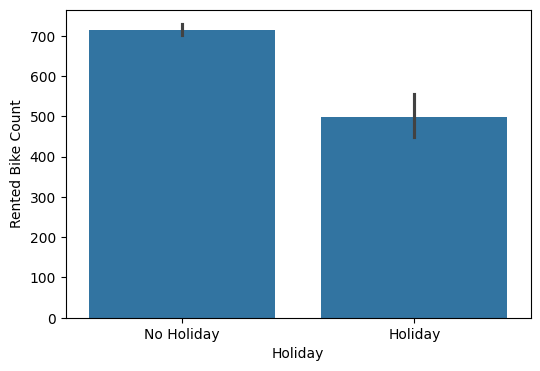

In [18]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Holiday", y="Rented Bike Count", data=df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

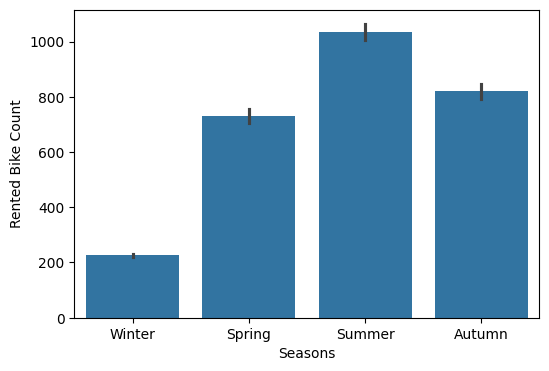

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Seasons", y="Rented Bike Count", data=df)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

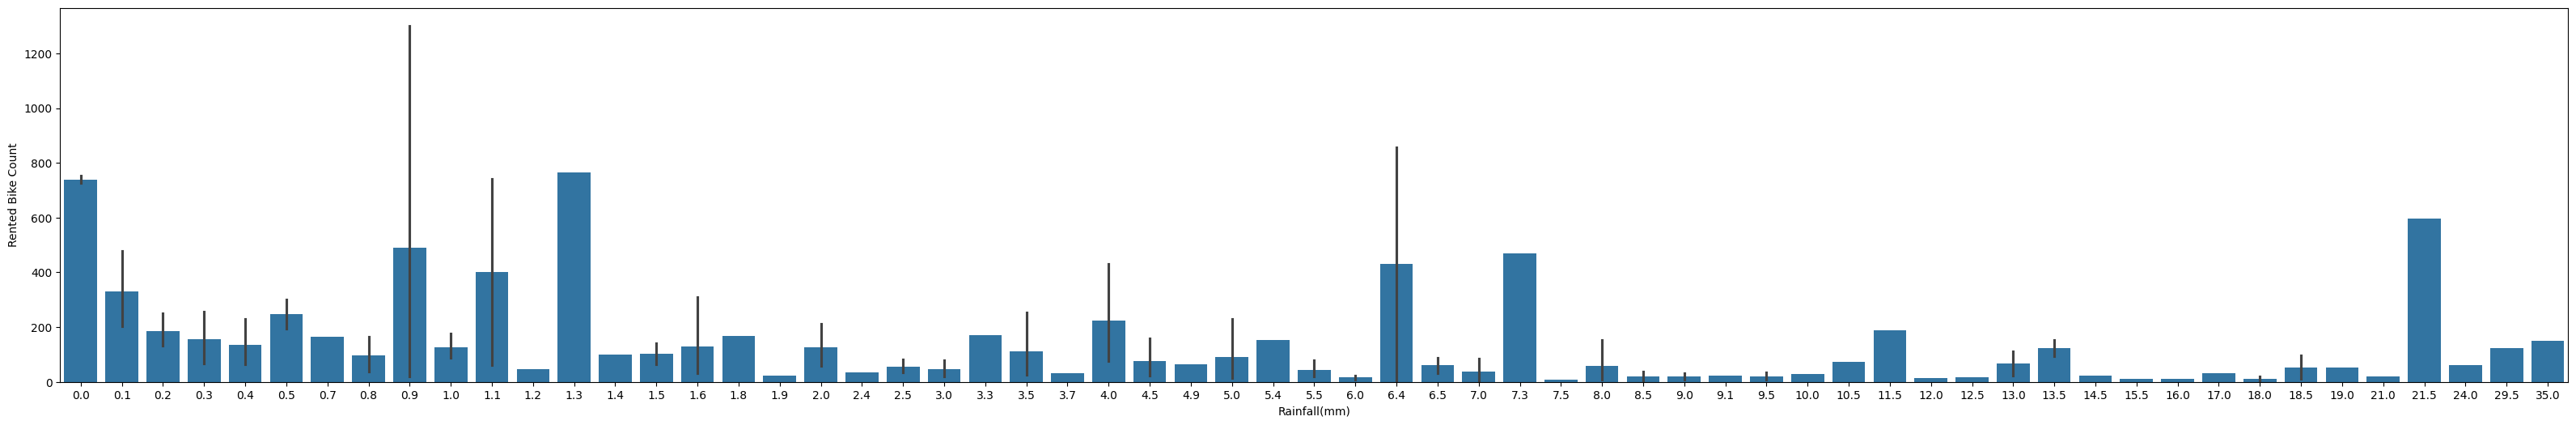

In [20]:
plt.figure(figsize=(40, 6))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=df)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

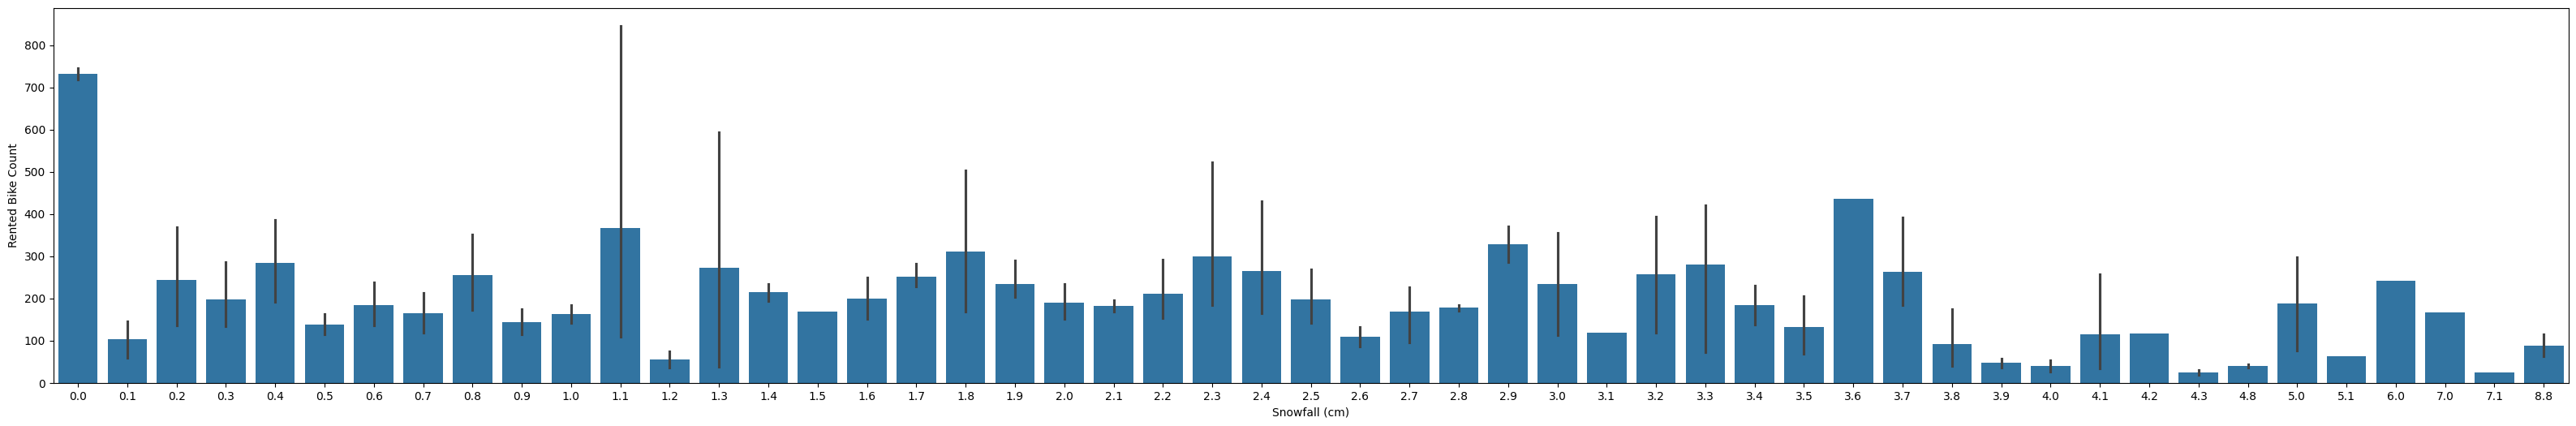

In [21]:
plt.figure(figsize=(40, 6))
sns.barplot(x="Snowfall (cm)", y="Rented Bike Count", data=df)

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

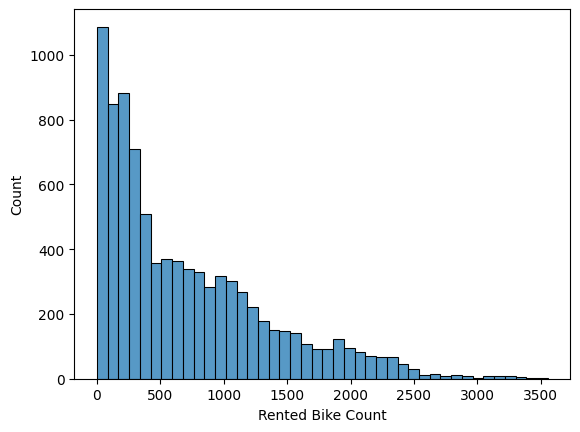

In [22]:
sns.histplot(df['Rented Bike Count'])

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

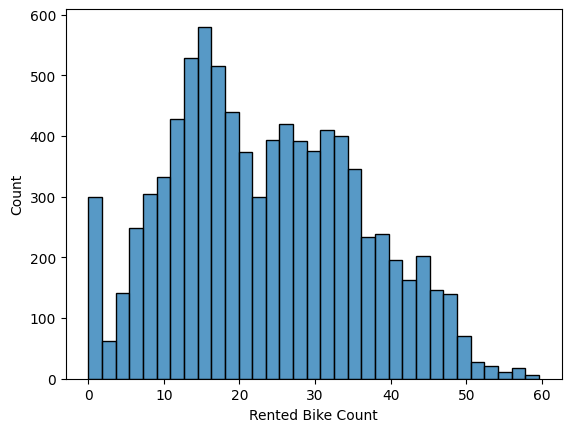

In [23]:
sns.histplot(np.sqrt(df['Rented Bike Count']))

---
## **Skewness:**

In [24]:
# Select only numerical columns before calculating skewness
numerical_df = df.select_dtypes(include=['float', 'int'])
numerical_df.skew().sort_values(ascending=True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

---
## **Remove multicolinearity:**

In [25]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day weekday  \
0           0.0            0.0  Winter  No Holiday             Yes  Friday   
1           0.0            0.0  Winter  No Holiday             Yes  Friday   
2           0.0            0.0  Winter  No Holiday             Yes  Friday   
3           0.0            0.0  Winter  No Holiday             Yes  Friday   
4           0.0            0.0  Winter  No Holiday             Yes  Friday   

   Day  Month  Year  
0    1     12  2017  
1    1     12  2017  
2    1     12  2017  
3    1     12  2017  
4    1     12  2017

In [26]:
print(df['Seasons'].unique())
print(df['Holiday'].unique())
print(df['Functioning Day'].unique())
print(df['weekday'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


In [27]:
# Converting categorical features to numerical data as I am gonna plot heatmap.
df['Seasons'] = df['Seasons'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4})

df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday':1})

df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No':0})

df['weekday'] = df['weekday'].map({'Sunday': 1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday': 6, 'Saturday': 7})

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   int64  
 11  Holiday                    8760 non-null   int64  
 12  Functioning Day            8760 non-null   int64  
 13  weekday                    8760 non-null   int64

<Axes: >

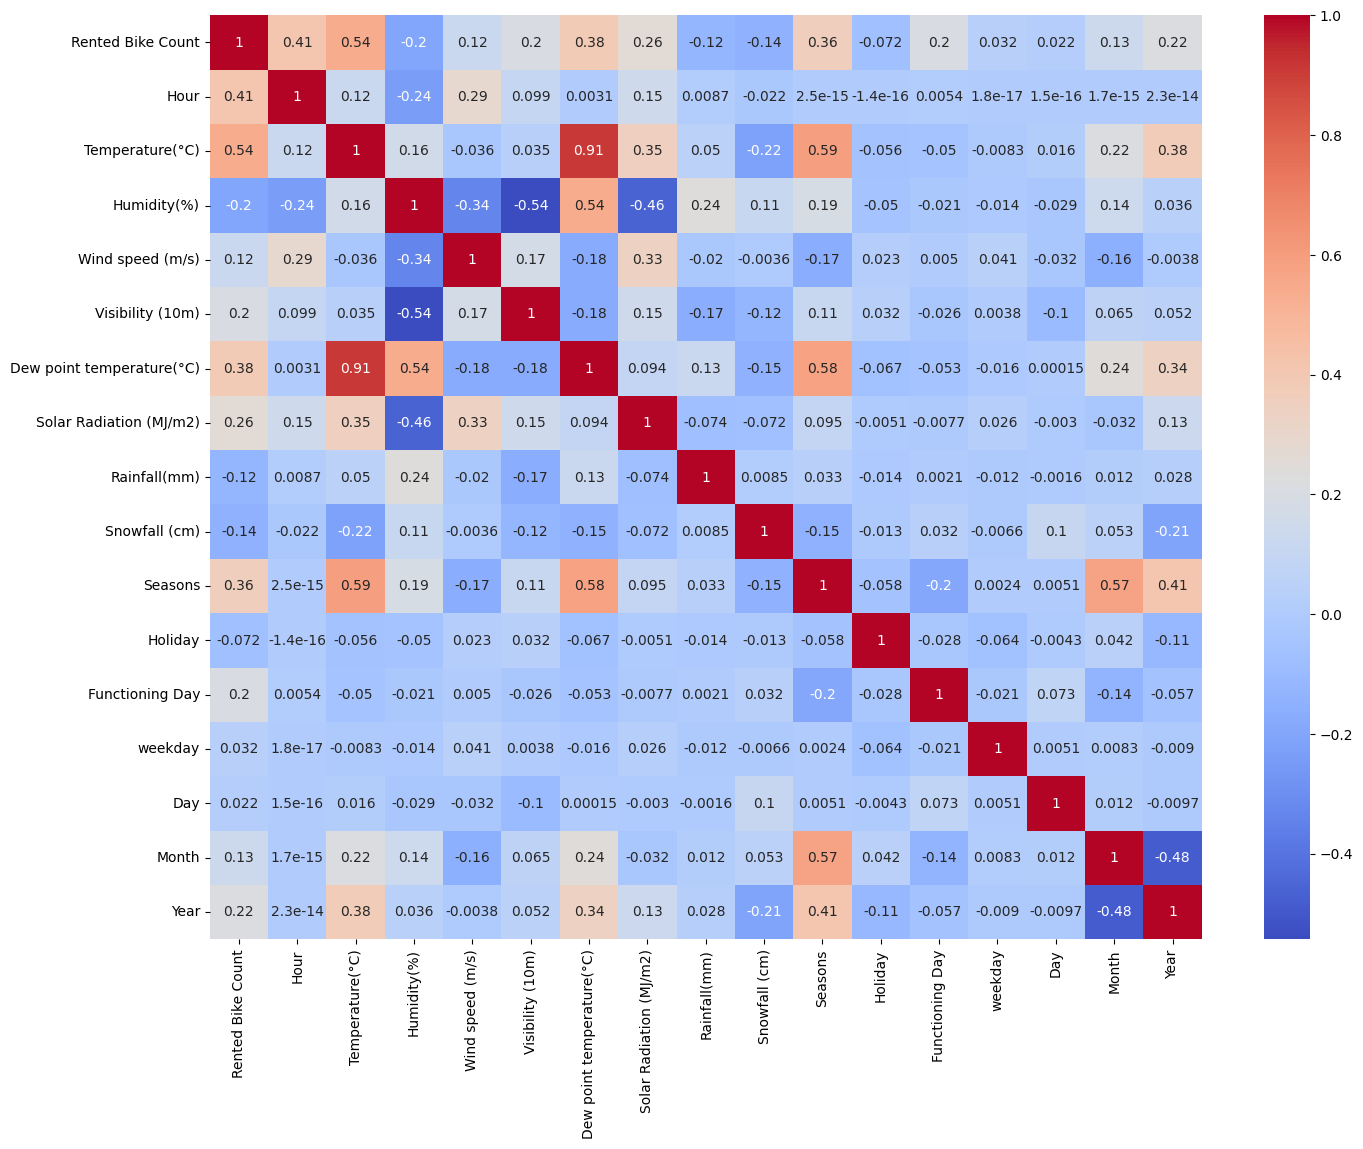

In [29]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## **Important insights:**
- **We will remove the features that has less correlation**

- **Multicolinearity:**
  - Temperature Vs Dew point temperature: strong corelation, we can use either of them.
  - Visibility vs humidity strong negative corelation, we will keep either of them.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
def get_vif(df):
  vif = pd.DataFrame()
  vif['variables'] = df.columns()
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return vif

In [32]:
[i for i in df.describe().columns if i ]

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'weekday',
 'Day',
 'Month',
 'Year']

In [33]:
for i in df.describe().columns:
  print(i)

Rented Bike Count
Hour
Temperature(°C)
Humidity(%)
Wind speed (m/s)
Visibility (10m)
Dew point temperature(°C)
Solar Radiation (MJ/m2)
Rainfall(mm)
Snowfall (cm)
Seasons
Holiday
Functioning Day
weekday
Day
Month
Year


In [34]:
df.drop("Dew point temperature(°C)", axis=1, inplace=True)

In [35]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Seasons  Holiday  Functioning Day  weekday  Day  Month  Year  
0        1        0                1        6    1     12  2017  
1        1        0                1        6    1     12  2017  
2        1        0                1        6    1     12  2017  
3        1        0                1        6    1     12  2017  
4        1        0                1        6    1     12  2017

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   int64  
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   int64  
 13  Day                      8760 non-null   int32  
 14  Month                   

In [37]:
# Incase you want to extract all the seasons as features
# df_season = pd.get_dummies(df['Seasons'])
# df = pd.concat([df, df_season])
# df

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   int64  
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  weekday                  8760 non-null   int64  
 13  Day                      8760 non-null   int32  
 14  Month                   

In [39]:
df.shape

(8760, 16)

---
## **Train test split:**

In [49]:
X = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7008, 15)
X_test shape: (1752, 15)
y_train shape: (7008,)
y_test shape: (1752,)


In [50]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [51]:
X_train[0]

array([ 0.50542093,  0.02237011,  0.13701177,  2.09293986, -1.17611282,
        0.5197009 , -0.13401915, -0.17102636,  1.34206189, -0.22996655,
        0.18708879,  0.99184617,  0.03124038,  1.30209798,  0.30179287])

In [52]:
sc.mean_

array([1.15102740e+01, 1.29340325e+01, 5.81992009e+01, 1.73076484e+00,
       1.43683390e+03, 5.75927511e-01, 1.43007991e-01, 7.72117580e-02,
       2.50642123e+00, 5.02283105e-02, 9.66181507e-01, 4.01640982e+00,
       1.57250285e+01, 6.51683790e+00, 2.01791652e+03])

---
## **Training the model:**

In [53]:
# Linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = lr.predict(X_test)
y_pred

array([ 956.3145    , 1210.64037355, 1337.07768952, ...,  942.28809892,
       -177.18451257, 1305.97887918])

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [56]:
MSE = mean_squared_error(y_test, y_pred)

RMSE = np.sqrt(MSE)

MAE = mean_absolute_error(y_test, y_pred)

R2 = r2_score(y_test, y_pred)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2:", R2)

MSE: 196496.4858315085
RMSE: 443.27924137219475
MAE: 331.6576726026991
R2: 0.528385310972102


In [59]:
def get_metrices(y_true, y_pred, model_name):
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  MAE = mean_absolute_error(y_test, y_pred)
  R2 = r2_score(y_test, y_pred)

  print(f"{model_name}: MSE: {round(MSE, 2)}, RMSE: {round(RMSE, 2)}, MAE: {round(MAE, 2)}, R2: {round(R2, 2)}")

In [60]:
get_metrices(y_test, y_pred, "Linear Regression")

Linear Regression: MSE: 196496.49, RMSE: 443.28, MAE: 331.66, R2: 0.53


In [61]:
# Training other models

from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [65]:
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rir = Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly_r = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [67]:
get_metrices(y_test, y_pred_lr, "LinearRegression")
get_metrices(y_test, y_pred_rir, "Ridge")
get_metrices(y_test, y_pred_lar, "Lasso")
get_metrices(y_test, y_pred_poly, "Polynomial Regression")
get_metrices(y_test, y_pred_svr, "SupportVectorRegressor")
get_metrices(y_test, y_pred_knnr, "KNearestNeighbors")
get_metrices(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrices(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrices(y_test, y_pred_xgbr, "XGBoost")

LinearRegression: MSE: 196496.49, RMSE: 443.28, MAE: 331.66, R2: 0.53
Ridge: MSE: 196480.69, RMSE: 443.26, MAE: 331.63, R2: 0.53
Lasso: MSE: 196181.15, RMSE: 442.92, MAE: 330.89, R2: 0.53
Polynomial Regression: MSE: 145943.18, RMSE: 382.03, MAE: 267.67, R2: 0.65
SupportVectorRegressor: MSE: 284068.8, RMSE: 532.98, MAE: 353.4, R2: 0.32
KNearestNeighbors: MSE: 99520.4, RMSE: 315.47, MAE: 201.37, R2: 0.76
DecisionTreeRegressor: MSE: 80968.89, RMSE: 284.55, MAE: 148.68, R2: 0.81
RandomForestRegressor: MSE: 33618.48, RMSE: 183.35, MAE: 105.28, R2: 0.92
XGBoost: MSE: 25146.96, RMSE: 158.58, MAE: 95.78, R2: 0.94


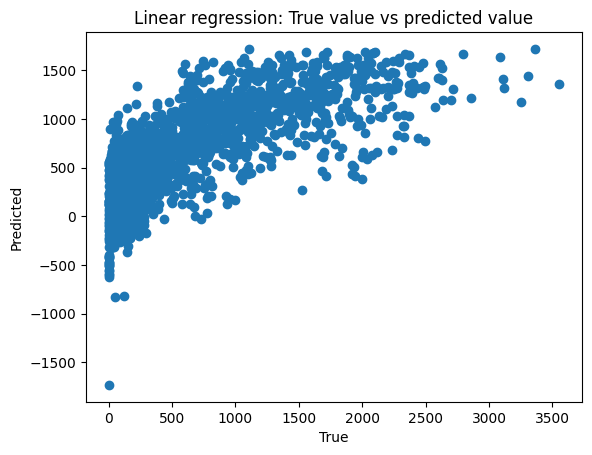

In [72]:
# Visualizing model predictions: of Linear regression
plt.scatter(y_test, y_pred_lr)
plt.title("Linear regression: True value vs predicted value")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

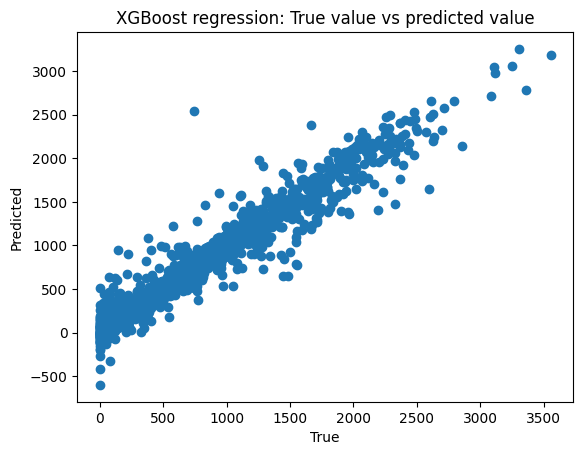

In [76]:
# Visualizing model predictions: of XGBoost regression
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGBoost regression: True value vs predicted value")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

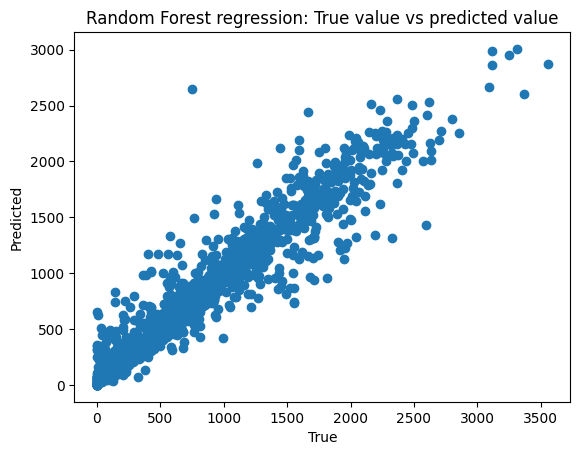

In [77]:
# Visualizing model predictions: of Random Forest regression
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest regression: True value vs predicted value")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [78]:
# Hyperparameter tuning on random forest regressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [79]:
import time
start_time = time.time()

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred_rf_random = rf_random.predict(X_test)

print("Time taken to training using randomize search : ", time.time()-start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Time taken to training using randomize search :  1357.2856216430664


In [83]:
get_metrices(y_test, y_pred_rf_random, "Random Forest Regression Fine Tuning")

Random Forest Regression Fine Tuning: MSE: 38834.45, RMSE: 197.06, MAE: 118.87, R2: 0.91


In [84]:
rf_random.best_params_
# {'n_estimators': 400,
#  'min_samples_split': 2,
#  'min_samples_leaf': 1,
#  'max_features': 'sqrt',
#  'max_depth': 120,
#  'bootstrap': False}

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'bootstrap': False}

In [86]:
rf_tuned = RandomForestRegressor(
  n_estimators = 400,
  min_samples_split = 2,
  min_samples_leaf = 1,
  max_features= 'sqrt',
  max_depth = 120,
  bootstrap = False
)

In [87]:
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

In [88]:
get_metrices(y_test, y_pred_rf_tuned, "Random Forest Regression Fine Tuning")

Random Forest Regression Fine Tuning: MSE: 38700.92, RMSE: 196.73, MAE: 119.44, R2: 0.91


In [89]:
# Hyperparameter tuning on XGBoost regressor
from sklearn.model_selection import RandomizedSearchCV

import time
start_time = time.time()

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}


xgbr = XGBRegressor(seed = 20)
rscv = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                          cv=5,
                         verbose=1)

rscv.fit(X_train, y_train)

y_pred_xgb_random = rscv.predict(X_test)

get_metrices(y_test, y_pred_xgb_random, "XGBRegressor With Best Parameters")

print("Time taken to training using randomize search : ", time.time()-start_time)

print("Best parameters:", rscv.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGBRegressor With Best Parameters: MSE: 20638.18, RMSE: 143.66, MAE: 85.71, R2: 0.95
Time taken to training using randomize search :  495.00957918167114
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.8999999999999999}


In [92]:
xgbr = XGBRegressor(subsample=0.6,
                   n_estimators=1000,
                   max_depth=6,
                   learning_rate=0.09,
                   colsample_bytree=0.7,
                   colsample_bylevel=0.4,
                   seed = 20)

xgbr.fit(X_train, y_train)

y_pred_tuned = xgbr.predict(X_test)

get_metrices(y_test, y_pred_tuned, "XGBRegressor With Best Parameters")

XGBRegressor With Best Parameters: MSE: 23775.98, RMSE: 154.19, MAE: 92.47, R2: 0.94


## **Saving the best model:**

In [95]:
import pickle
import os

dir = "models"
model_file_name = "xgboost_regressor_r2_0_928_v1.pkl"

if not os.path.exists(dir):
  os.makedirs(dir)

model_file_path = os.path.join(dir, model_file_name)
pickle.dump(xgbr, open(model_file_path, "wb"))